In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data_.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")
df_val= pd.read_csv("Data/ParisHousing_val_data.csv")


#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 

df_val_x= df_val.drop(columns=['price'])  
df_val_y= df_val['price'] 

In [3]:
# Ensure reproducibility
tf.random.set_seed(42)

# Preprocessing: Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_x)
X_test_scaled = scaler.transform(df_test_x)
X_val_scaled = scaler.transform(df_val_x)

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),                                         # Second hidden layer
    Dense(1)                                                              # Output layer
])

In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

In [6]:
# Train the model
history = model.fit(
    X_train_scaled, df_train_y,
    validation_data=(X_val_scaled, df_val_y),
    epochs=250,  # Adjust epochs as needed
    batch_size=32,
    verbose=1
)

Epoch 1/250
213/213 [==============================] - 0s 1ms/step - loss: 33115347091456.0000 - mae: 4992610.5000 - mse: 33115347091456.0000 - val_loss: 33272610422784.0000 - val_mae: 5003923.0000 - val_mse: 33272610422784.0000
Epoch 2/250
213/213 [==============================] - 0s 933us/step - loss: 33111245062144.0000 - mae: 4992267.0000 - mse: 33111245062144.0000 - val_loss: 33264121151488.0000 - val_mae: 5003228.0000 - val_mse: 33264121151488.0000
Epoch 3/250
213/213 [==============================] - 0s 1ms/step - loss: 33096202190848.0000 - mae: 4991047.5000 - mse: 33096202190848.0000 - val_loss: 33241295749120.0000 - val_mae: 5001400.5000 - val_mse: 33241295749120.0000
Epoch 4/250
213/213 [==============================] - 0s 1ms/step - loss: 33064044462080.0000 - mae: 4988488.5000 - mse: 33064044462080.0000 - val_loss: 33198736146432.0000 - val_mae: 4998040.0000 - val_mse: 33198736146432.0000
Epoch 5/250
213/213 [==============================] - 0s 997us/step - loss: 33009

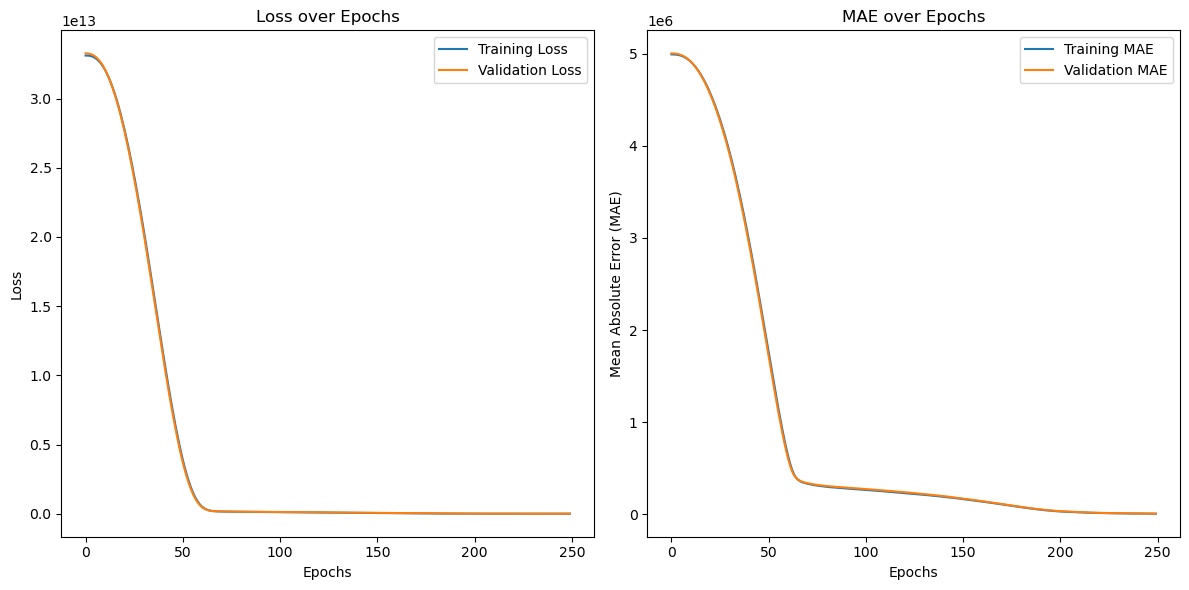

In [7]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.figure(figsize=(12, 6))

# Pérdida en entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Si tienes métricas como MSE o MAE, puedes graficarlas también
# Aquí se asume que el modelo tiene 'mean_absolute_error' o 'mean_squared_error' como métricas en el entrenamiento

# Gráfico de MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Make predictions
y_pred_test = model.predict(X_test_scaled).flatten()
y_pred_val = model.predict(X_val_scaled).flatten()


In [9]:
# Evaluate the model

mse_test = mean_squared_error(df_test_y, y_pred_test)
mae_test = mean_absolute_error(df_test_y, y_pred_test)
mape_test = np.mean(np.abs((df_test_y - y_pred_test) / df_test_y)) * 100

mse_val = mean_squared_error(df_val_y, y_pred_val)
mae_val = mean_absolute_error(df_val_y, y_pred_val)
mape_val = np.mean(np.abs((df_val_y - y_pred_val) / df_val_y)) * 100

# Print results
print("\nEvaluation on the test set:")
print("MSE (Mean Squared Error):", mse_test)
print("MAE (Mean Absolute Error):", mae_test)
print("MAPE (Mean Absolute Percentage Error):", mape_test, "%")

print("\nEvaluation on the validation set:")
print("MSE (Mean Squared Error):", mse_val)
print("MAE (Mean Absolute Error):", mae_val)
print("MAPE (Mean Absolute Percentage Error):", mape_val, "%")


Evaluation on the test set:
MSE (Mean Squared Error): 135453958.05954832
MAE (Mean Absolute Error): 7048.266542578129
MAPE (Mean Absolute Percentage Error): 2.5617095967054357 %

Evaluation on the validation set:
MSE (Mean Squared Error): 151624305.3286268
MAE (Mean Absolute Error): 7209.464641276039
MAPE (Mean Absolute Percentage Error): 2.0182274645223917 %
